## IOT Data analysis 
### Anomaly Detection, Analysis based on data collected from 54 sensors

Future work: Using LSTM or GRU, we can predict future temperature,humidity,light and voltage readings based on the given time series data. It is the case of Multidimensional and multivariate time series model.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline 
import scipy.integrate as integrate
from scipy.optimize import curve_fit
pd.options.display.max_rows = 12

In [5]:
!ls /data.txt

/data.txt


In [7]:
input_path = "/data.txt"
data = pd.read_csv(input_path, sep = ' ',header = None ,names = ['date', 'time','epoch','moteid','temp','humidity','light','voltage'])


In [ ]:
data.head()

,date,time,epoch,moteid,temp,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [ ]:
data.shape

(2313682, 8)

In [ ]:
data.describe()

,epoch,moteid,temp,humidity,light,voltage
count,2.313682e+06,2.313156e+06,2.312781e+06,2.312780e+06,2.219804e+06,2.313156e+06
mean,3.303993e+04,2.854412e+01,3.920700e+01,3.390814e+01,4.072110e+02,2.492552e+00
std,1.836852e+04,5.062408e+01,3.741923e+01,1.732152e+01,5.394276e+02,1.795743e-01
min,0.000000e+00,1.000000e+00,-3.840000e+01,-8.983130e+03,0.000000e+00,9.100830e-03
25%,1.757200e+04,1.700000e+01,2.040980e+01,3.187760e+01,3.956000e+01,2.385220e+00
50%,3.332700e+04,2.900000e+01,2.243840e+01,3.928030e+01,1.582400e+02,2.527320e+00
75%,4.778900e+04,4.100000e+01,2.702480e+01,4.358550e+01,5.372800e+02,2.627960e+00
max,6.553500e+04,6.540700e+04,3.855680e+02,1.375120e+02,1.847360e+03,1.856000e+01


In [ ]:
data.isnull().sum()

date            0
time            0
epoch           0
moteid        526
temp          901
humidity      902
light       93878
voltage       526
dtype: int64

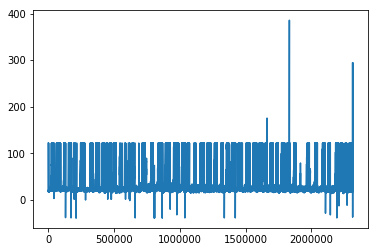

In [ ]:
data['temp'].plot()

In [8]:
data['temp'].fillna(data['temp'].mean(), inplace=True)
data['humidity'].fillna(data['humidity'].mean(), inplace=True)
data['light'].fillna(data['light'].mean(), inplace=True)
data['voltage'].fillna(data['voltage'].mean(), inplace=True)
data.fillna(0,inplace = True)
data['epoch'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
data['epoch'] = data['epoch'].astype(int)

In [ ]:
data.isnull().sum()

date        0
time        0
epoch       0
moteid      0
temp        0
humidity    0
light       0
voltage     0
dtype: int64

In [ ]:
data.head()

,date,time,epoch,moteid,temp,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [9]:
data.groupby('moteid').mean()

,epoch,temp,humidity,light,voltage
moteid,,,,,
1,31994.793830,35.882437,34.319280,156.575828,2.519643
2,36491.176404,40.201817,34.298739,212.159717,2.458436
3,33013.771411,33.716121,34.787885,146.056701,2.517961
4,32688.045167,45.464410,29.991159,155.491512,2.468170
5,5836.428571,38.803153,33.120686,327.681372,2.516088
...,...,...,...,...,...
17,29131.978867,38.408517,32.008685,409.333853,2.446132
18,22953.381315,47.101543,29.148533,228.258667,2.352064
19,33297.427304,47.166613,28.389809,189.504202,2.483965


In [10]:
data['Timestamp'] = data[['date', 'time']].apply(lambda x: ' '.join(x.astype(str)), axis=1)
new_data = data

In [11]:
data.drop(['date','time'],axis=1,inplace =True)
data.set_index(pd.to_datetime(data.Timestamp), inplace=True)

In [12]:
data[['moteid','temp','humidity','light','voltage']] = data[['moteid','temp','humidity','light','voltage']].apply(pd.to_numeric)

In [13]:
data['moteid'].value_counts()

21    55941
7     55361
9     49890
10    47165
2     46915
      ...  
20    28835
12    23078
8     16778
15     2337
5        35
Name: moteid, Length: 21, dtype: int64

In [14]:
moteid_grp = data.groupby(['moteid'])

In [15]:
corr_id = moteid_grp.corr(method='pearson')
corr_id.fillna(0, inplace=True)
corr_id

epoch      temp  humidity     light   voltage
moteid                                                           
1      epoch     1.000000  0.315767 -0.195395  0.014605 -0.726957
       temp      0.315767  1.000000 -0.801979  0.016722 -0.801028
       humidity -0.195395 -0.801979  1.000000 -0.109155  0.537037
       light     0.014605  0.016722 -0.109155  1.000000  0.081781
       voltage  -0.726957 -0.801028  0.537037  0.081781  1.000000
...                   ...       ...       ...       ...       ...
21     epoch     1.000000  0.156860 -0.019773  0.102680 -0.710449
       temp      0.156860  1.000000 -0.670619 -0.058718 -0.718303
       humidity -0.019773 -0.670619  1.000000 -0.156116  0.323563
       light     0.102680 -0.058718 -0.156116  1.000000  0.133545
       voltage  -0.710449 -0.718303  0.323563  0.133545  1.000000

[105 rows x 5 columns]

In [16]:
data.head()

,epoch,moteid,temp,humidity,light,voltage,Timestamp
Timestamp,,,,,,,
2004-03-31 03:38:15.757551,2,1,122.1530,-3.91901,11.04,2.03397,2004-03-31 03:38:15.757551
2004-02-28 00:59:16.027850,3,1,19.9884,37.09330,45.08,2.69964,2004-02-28 00:59:16.02785
2004-02-28 01:03:16.333930,11,1,19.3024,38.46290,45.08,2.68742,2004-02-28 01:03:16.33393
2004-02-28 01:06:16.013453,17,1,19.1652,38.80390,45.08,2.68742,2004-02-28 01:06:16.013453
2004-02-28 01:06:46.778088,18,1,19.1750,38.83790,45.08,2.69964,2004-02-28 01:06:46.778088


In [17]:
new = data['2004/3/1':'2004/3/21']

#I create two datafranes to hold the data used for covariance calculations
Temperature_data = pd.DataFrame()
Humidity_data = pd.DataFrame()
test = pd.DataFrame()

#Write data from Node 14
test = new.loc[data.moteid==14]
test = test.groupby([test.index.year,test.index.month,test.index.day, test.index.hour]).mean()
Temperature_data [['Node14']] = test[['temp']]
Humidity_data[['Node14']] = test[['humidity']]

#Write data from Nodes 22 to 29
for i in range(8):
    j = i + 22
    test = new.loc[data.moteid==j]
    test = test.groupby([test.index.year,test.index.month,test.index.day, test.index.hour]).mean()
    Temperature_data[['Node' + str(j)]] = test[['temp']]
    Humidity_data[['Node'+ str(j)]] = test[['humidity']]

<ipython-input-17-ca61370655eb>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  new = data['2004/3/1':'2004/3/21']


In [ ]:
Temperature_data

In [ ]:
Humidity_data

### Covariance models in time for the temperature
Temperature time lags from 0 to 9

In [18]:
node_distance = pd.read_csv('/intel_nodes.csv')

lists_hy = []
lists_hx = []
    
for z in range(10):
    # Calculation of the covariance for lag i hour for temp
    humy = [None] *45
    humx = [None] *45
    k=0
    i=0
    for first_column in Temperature_data:
        df1 = Temperature_data[first_column][:-(1+z)]
        std_test1=np.std(df1)
        j = 0 
        for second_column in Temperature_data:
            if j <= i:
                df2 = Temperature_data[second_column][(1+z):]
                std_test2=np.std(df2)
                humy[k] = (np.cov(df1,df2)/(std_test1*std_test2)).item((0, 1))
                humx[k] = node_distance.iloc[i,j]
                j = j + 1
                k = k + 1
        i = i + 1
    lists_hy.append(humy)
    lists_hx.append(humx)

FileNotFoundError: ignored

#### Calculating averages for time component:

In [ ]:
temperature_timex = []
temperature_timey = []
for i in range(10):
    average = (sum(lists_hy[i])/len(lists_hy[i]))
    temperature_timey.append(average)

for z in range(10):
    temperature_timex.append(z)

plt.scatter(temperature_timex, temperature_timey)

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(data['temp'])
#Plot pACF: a
plt.subplot(121) 
plt.plot(lag_acf)


### Variation in humidity, temp, light, voltage with epoch

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(60,20))

for xcol, ax in zip(['humidity', 'temp', 'light','voltage'], axes):
    data.plot(kind='scatter', x='epoch', y=xcol, ax=ax, alpha=1, color='r')

### Variation with Voltage

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30))
for xcol, ax in zip(['temp', 'light','humidity'], axes):
    data.plot(kind='scatter', x='voltage', y=xcol, ax=ax, color='b')

### Variation with light

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30))
for xcol, ax in zip(['temp', 'humidity','voltage'], axes):
    data.plot(kind='scatter', x='light', y=xcol, ax=ax, alpha=1, color='g')

### Variation with Humidity

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30))
for xcol, ax in zip(['temp', 'light','voltage'], axes):
    data.plot(kind='scatter', x='humidity', y=xcol, ax=ax, alpha=1, color='y')

### Variation with temperature

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(60,30))
for xcol, ax in zip(['humidity', 'light','voltage'], axes):
    data.plot(kind='scatter', x='temp', y=xcol, ax=ax, alpha=1, color='b')

### Variation in Tempeature, Humidity, light and Voltage over time

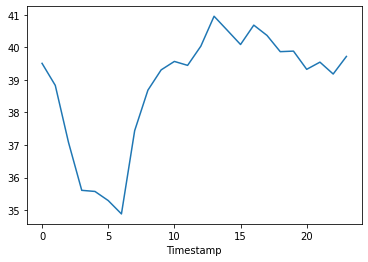

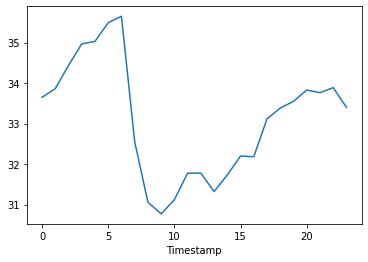

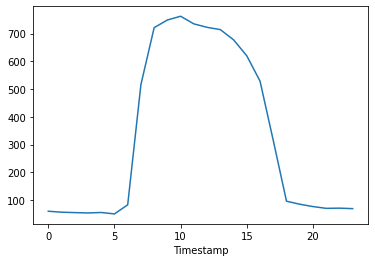

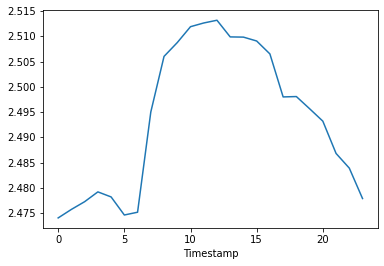

In [19]:
data.index
index_hour = data.index.hour
df1_by_hour =data['temp'].groupby(index_hour).mean()
df1_by_hour.plot()
plt.show()
data.index
index_hour = data.index.hour
df1_by_hour =data['humidity'].groupby(index_hour).mean()
df1_by_hour.plot()
plt.show()
data.index
index_hour = data.index.hour
df1_by_hour =data['light'].groupby(index_hour).mean()
df1_by_hour.plot()
plt.show()
data.index
index_hour = data.index.hour
df1_by_hour =data['voltage'].groupby(index_hour).mean()
df1_by_hour.plot()
plt.show()

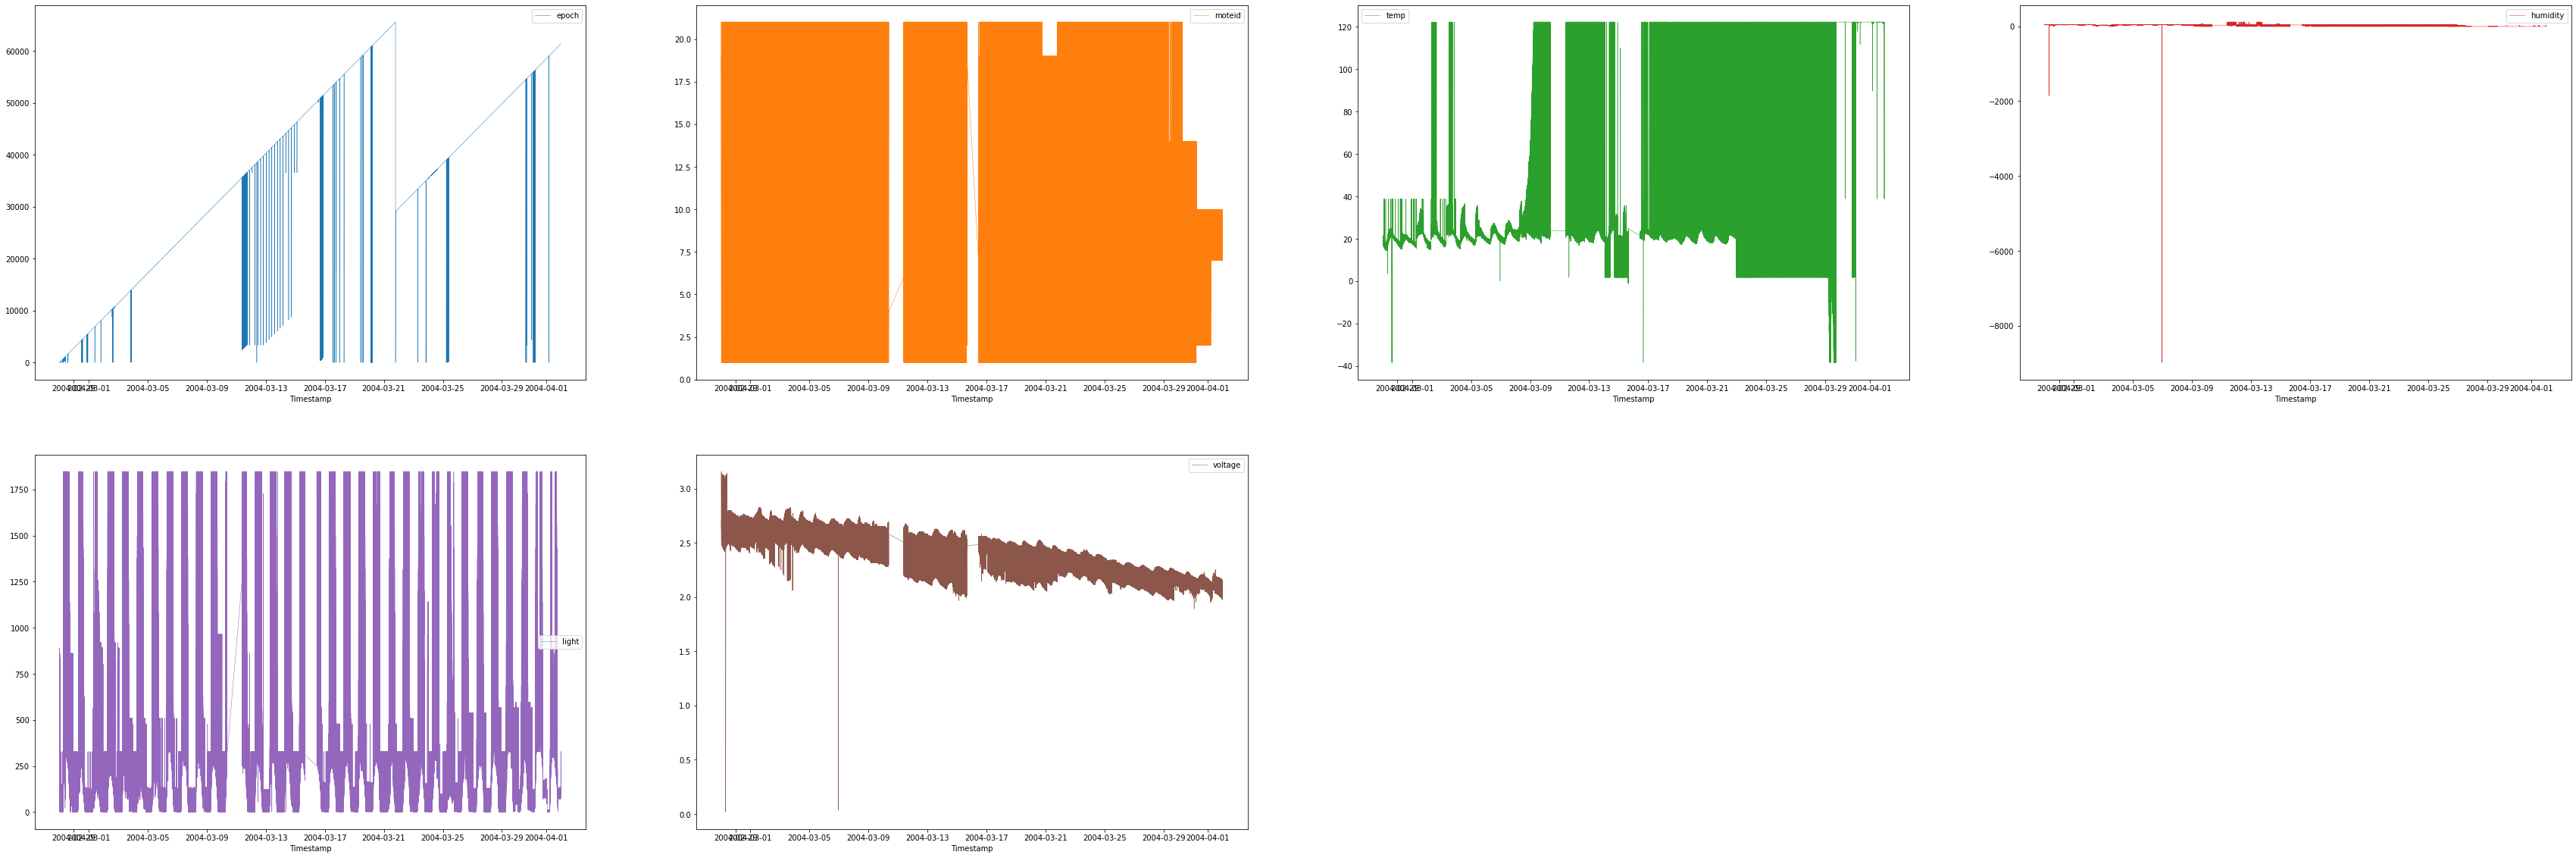

In [20]:
new_data.plot(subplots=True,linewidth=0.5,
                layout=(2, 4),figsize=(60, 20),
                sharex=False,
                sharey=False)

plt.show()

### Pearson Correlation for the multivariate time series  

In [21]:
new_data.corr(method='pearson')

,epoch,moteid,temp,humidity,light,voltage
epoch,1.000000,-0.104233,0.397244,-0.254195,0.004900,-0.710479
moteid,-0.104233,1.000000,0.013770,-0.011583,0.077359,0.014154
temp,0.397244,0.013770,1.000000,-0.640654,0.001909,-0.743534
humidity,-0.254195,-0.011583,-0.640654,1.000000,-0.034969,0.540470
light,0.004900,0.077359,0.001909,-0.034969,1.000000,0.052872
voltage,-0.710479,0.014154,-0.743534,0.540470,0.052872,1.000000


### Variation in temperature readings over time for moteid's: 21 and 22

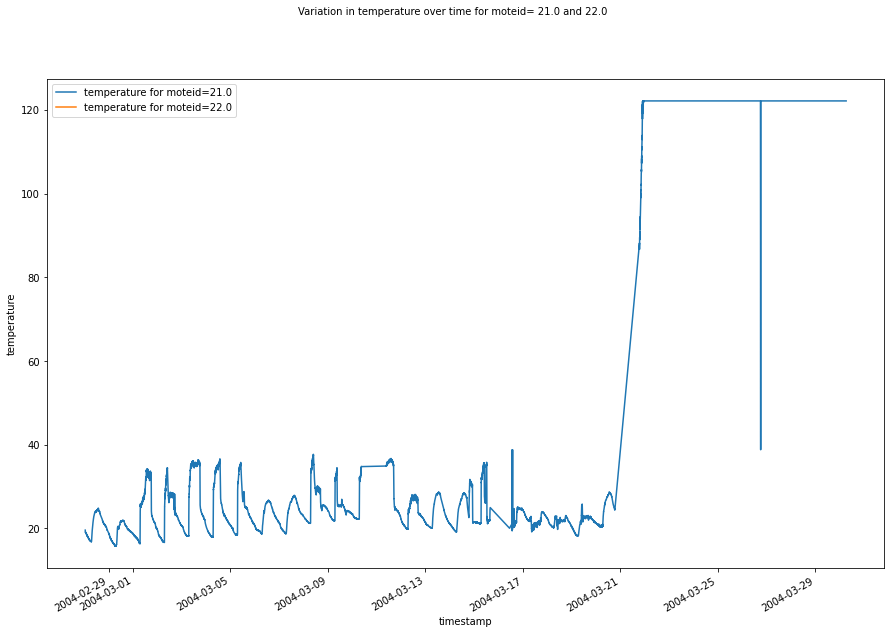

In [22]:
from matplotlib import pyplot as plt 
d_m21 = data.loc[data['moteid'] == 21.0]
d_m22 = data.loc[data['moteid'] == 22.0]
d_m10 = data.loc[data['moteid'] == 10.0]
fig2 = plt.figure(figsize = (15,10))
d_m21['temp'].plot(label='temperature for moteid=21.0')
d_m22['temp'].plot(label='temperature for moteid=22.0')
fig2.suptitle('Variation in temperature over time for moteid= 21.0 and 22.0', fontsize=10)
plt.xlabel('timestamp', fontsize=10)
plt.ylabel('temperature', fontsize=10)
plt.legend()

### Anomaly Detection using moving average method
For moteid:10 and window size: 20, we calculate the mean and standard deviation of the data.If the next entry in the dataframe lies between mean(+-)sd*2,
it is considered normal else it is considered an anamoly.

Anomaly can be seen by blue *

[23743 23751 23761 23999 24206 24302 24303 24324 24350 25415 26094 26101
 26325 26336 26371 26422 26437 26549 26551 26581 26588 26622 26624 26636
 26713 26723 29505 29506 29507 36012 36017 40733 40748 40775 40779 40787
 40840 40841 40848 40982 41115 41201]


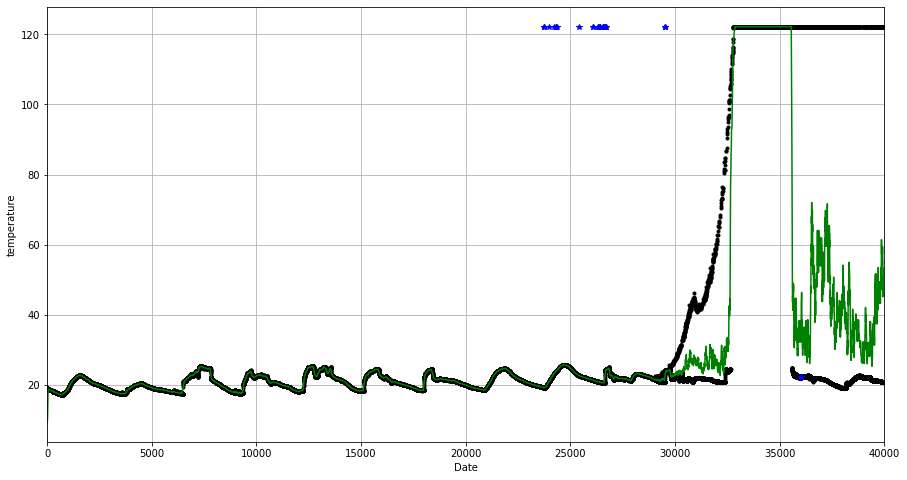

In [23]:
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
%matplotlib inline
def mov_average(data, window_size):

    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')
def find_anomalies(y, window_size, sigma=1.0):
    avg = mov_average(y, window_size).tolist()
    residual = y - avg
    std = np.std(residual)
    return {'standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
   
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = mov_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 40000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)
    events = {}
    events = find_anomalies(y, window_size=window_size, sigma=sigma_value)
    

    x_anom = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anom = np.fromiter(events['anomalies_dict'].values(), dtype=float,count=len(events['anomalies_dict']))
    plt.plot(x_anom, y_anom, "b*")
    print(x_anom)
    plt.grid(True)
    plt.show()
x = d_m10['epoch']
Y = d_m10['temp']
plot_results(x, y=Y, window_size=50, text_xlabel="Date", sigma_value=3,text_ylabel="temperature")